# pandas, seaborn, scikit-learn 



## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

In [1]:
# conventional way to import pandas
import pandas as pd

In [6]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('C:/Users/mishr/Desktop/Advertising.csv', index_col=0)

#see impact of below line, i.e. do not specify the index_col...
#data = pd.read_csv('data/Advertising.csv')  


# display the first 5 rows
data.head()
#data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [3]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)


Anything else?


- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

run **`conda install seaborn`** from the Anaconda command line, if it is not already installed.

In [8]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\mishr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'Sales'

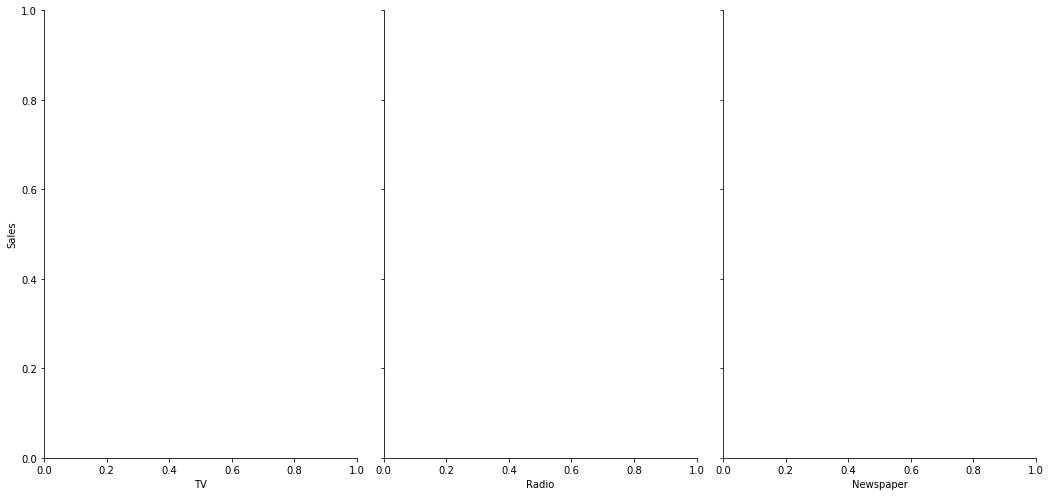

In [9]:
# visualize the relationship between the individual features and the response using scatterplots

#sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

- $y$ is the response
- $\theta_0$ is the intercept
- $\theta_1$ is the coefficient for $x_1$ (the first feature)
- $\theta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \theta_0 + \theta_1 \times TV + \theta_2 \times Radio + \theta_3 \times Newspaper$

The $\theta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!


### Advantages of Linear Regression
1. It runs quickly, so it is extensively used in Real Time Problems especially for **large size data sets**.
2. No major tuning required, as for example required to tune K in KNN problem.
3. It is highly interpretably, i.e. easy to understand.
4. Very old regression technique, so it has vast literature to understand

### Drawbacks of Linear Regression
1. Unlikely to produce best results and accuracy, as it assumes linear relationship between Features and Response, which is highly unlikely in Real World.



## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- As Pandas is built on top of NumPy, so X can be a pandas DataFrame and y can be a pandas Series!

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


## random_state value has an impact on the way the data is split in train and test data
## test_size value impacts as how much of data to be given in test data table

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


(160, 3)
(160,)
(40, 3)
(40,)
        TV  Radio  Newspaper
160  131.7   18.4       34.6
63   239.3   15.5       27.3
167   17.9   37.6       21.6
46   175.1   22.5       31.5
24   228.3   16.9       26.2
2     44.5   39.3       45.1
163  188.4   18.1       25.6
49   227.2   15.8       49.9
161  172.5   18.1       30.7
127    7.8   38.9       50.6
124  123.1   34.6       12.4
108   90.4    0.3       23.2
44   206.9    8.4       26.4
153  197.6   23.3       14.2
115   78.2   46.8       34.5
47    89.7    9.9       35.7
173   19.6   20.1       17.0
103  280.2   10.1       21.4
62   261.3   42.7       54.7
116   75.1   35.0       52.7
171   50.0   11.6       18.4
183   56.2    5.7       29.7
60   210.7   29.5        9.3
186  205.0   45.1       19.6
13    23.8   35.1       65.9
75   213.4   24.6       13.1
121  141.3   26.8       46.2
177  248.4   30.2       20.3
20   147.3   23.9       19.1
58   136.2   19.2       16.6
..     ...    ...        ...
197   94.2    4.9        8.1
104  187.9   

## Linear regression in scikit-learn

In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linreg.get_params(True)

# copy_X: If True, X will be copied; else, it may be overwritten.

#fit_intercept: Whether to calculate intercept, i.e. \theta_0 in this scenario. 
                #It is to be set to false if we know that Data is already centered, i.e. \theta_0 = 0

# n_jobs: Default is 1.. to be set to higher values for large problems, when we intend to use more then 
          # core/CPU on the system.

# normalize: This parameter is ignored when fit_intercept is set to False. If fit_intercept is True, 
        # the regressors X will be normalized (i.e. to bring with-in the range -1 to 1) before regression 
        # by subtracting the mean and dividing by RANGE.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

### Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.931280343575775
[ 0.04688034  0.1824328  -0.00164674]


In [15]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04688034130700544),
 ('Radio', 0.18243279575750576),
 ('Newspaper', -0.0016467403865370355)]

$$y = 2.93 + 0.0468 \times TV + 0.182 \times Radio - 0.0016 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important note:

- If an increase in TV ad spending was associated with a **decrease** in sales, $\theta_1$ would be **negative**.

- This is a statement of **association**, and not **causation**.. **Causation** means that so much of TV ad spending would guaranteed generate this much of Sales, but that's not true, as Sales also depend on many other factores, like Product quality, market cost, demand in area etc. etc. So here we can mere put the **Association** between TV Ad Spending Vs Sales



### Making predictions

In [32]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)
print(y_test)

[21.73751851 16.40451622  7.64073276 17.81512707 18.6140367  23.75320401
 16.26267467 13.30968011  9.11623605 17.24121988 14.37997584  9.86630093
 17.28107008 16.70455883 14.93571851 15.47067849 12.39847009 17.21737409
 11.18626133 18.09114847  9.34543641 12.71804909  8.75327159 10.468843
 11.34116649 14.98646893  9.77329331 19.43186663 18.31005062 17.14215851
 21.62609193 14.47149683 16.3536012  12.27215653 19.97488243 15.34878155
 13.90760851  9.99030388 20.98440888  7.482353    3.61019982  7.1944428
  5.99097416 18.39958364  8.35858094 14.12195436 15.05074527 20.38304162
 20.65191677 19.47457534]
59     23.8
41     16.6
35      9.5
103    14.8
185    17.6
199    25.5
96     16.9
5      12.9
30     10.5
169    17.1
172    14.5
19     11.3
12     17.4
90     16.7
111    13.4
119    15.9
160    12.9
36     12.8
137     9.5
60     18.4
52     10.7
17     12.5
45      8.5
95     11.5
32     11.9
163    14.9
39     10.1
29     18.9
194    19.6
28     15.9
48     23.2
166    11.9
195    17

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [17]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [18]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**It is preferred over MAE, as it Penalises the Larger values..** 

In [19]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Preferred over both MAE, and MSE, as it penalises Larger values, as well as square root brings the data back to Units of Response Variables... **

In [20]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5971739466799182


# Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions? 

As per \theta_3 value, it has very weak correlation with Sales


Let's **remove it** from the model and check the RMSE!

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.